In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
# Loading predefined dataset = Boston dataset
boston_ds = datasets.load_boston()

In [4]:
print(boston_ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
# Build dataframe from dataset
boston_df = pd.DataFrame(boston_ds.data)

In [9]:
boston_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
boston_df.columns = boston_ds.feature_names

In [11]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [14]:
boston_df_target = np.asarray(boston_ds.target)

In [15]:
boston_df_target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [16]:
boston_df['House Price'] = pd.Series(boston_df_target)

In [17]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
# Divide the dataframe into X and Y variable
x = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1]
x, y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

In [19]:
# split it into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [21]:
## Apply multiple Linear Regression model
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [23]:
# predict test data with lreg model
lreg_y_pred = lreg.predict(x_test)
lreg_y_pred

array([35.28273754, 15.29757284,  8.84713401, 25.20875992, 24.35157993,
       35.99469458, 12.02417938, 30.65366497, 42.45892415, 20.16176818,
       21.65406714, 15.07767586, 25.98282028, 32.81974802, 21.06860746,
       33.19897754, 32.63192176, 17.93397337,  4.22893272, 21.19923517,
       24.21130365, 19.12425067, 21.3440648 , 14.3585515 , 12.28478195,
       42.19922132, 17.70504877, 26.36991907, 41.12920187,  6.49029607,
       17.08089696, 23.86588469, 28.78575893, 27.34679695, 32.07400506,
       15.69354568, 14.09672994, 32.17480159, 19.91647078, 25.51757809,
       26.63848155, 22.41407442, 19.41866559, 23.64308116, 23.70694683,
       23.63450698, 25.58538034, 24.64860555, 21.55538432, 20.37905165,
       21.86141037, 23.82129597, 22.9089217 , 25.73246332, 32.99699967,
       23.23052107, 29.26471656, 22.16666436, 25.09249212, 17.65987882,
       22.63915366, 23.27823953, 12.61773426, 21.19525882, 19.15261544,
       20.66540721, 30.25185629, 22.86546139, 10.20936731, 27.73

In [25]:
# Calculated Mean Squared error
meansqerror = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared error on Test data set :",meansqerror)

Mean squared error on Test data set : 20.49436009698381


In [27]:
# Add Coefficient to their variable names
lreg_coeff = pd.DataFrame()
lreg_coeff

""


In [30]:
lreg_coeff["Columns"] = x_train.columns
lreg_coeff

,Columns
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [31]:
lreg_coeff['Coeff Estimate'] = pd.Series(lreg.coef_)
lreg_coeff

,Columns,Coeff Estimate
0,CRIM,-0.114016
1,ZN,0.040419
2,INDUS,-0.014909
3,CHAS,3.522754
4,NOX,-20.587906
5,RM,3.117748
6,AGE,0.008027
7,DIS,-1.734569
8,RAD,0.296625
9,TAX,-0.010204


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


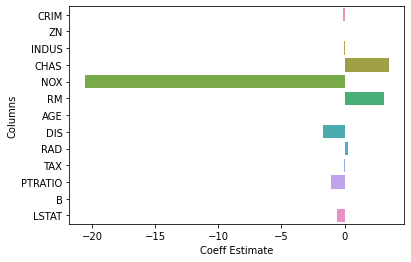

In [32]:
import seaborn as sns
sns.barplot(x='Coeff Estimate', y='Columns', data=lreg_coeff)

## Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

In [34]:
## Build Training model
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)

Ridge(alpha=1)

In [36]:
# pred test data with Ridge model
y_pred_ridge = ridge.predict(x_test)
y_pred_ridge

array([35.98875744, 15.62922807, 10.61703705, 25.06943388, 24.23002564,
       35.43809921, 11.26481753, 31.02188582, 41.91176844, 20.40797729,
       21.36416049, 16.97733045, 25.98013555, 32.44622636, 21.57564437,
       32.67866637, 32.50981163, 18.23319061,  3.06014463, 20.75456419,
       23.74830743, 19.29357931, 20.78118305, 14.45051374, 14.09279107,
       41.98570345, 18.3580836 , 26.95030485, 40.88571042,  5.98588242,
       16.21362469, 23.67357094, 28.24967112, 27.57255164, 31.81722871,
       15.7940645 , 13.44817909, 32.35193534, 18.89228223, 24.94108864,
       26.13881489, 21.76113378, 19.15671016, 22.70391792, 23.1494961 ,
       22.66513995, 25.60665014, 24.52741186, 21.15717011, 20.41024237,
       22.29909005, 24.31135911, 24.01901405, 25.08557813, 32.47110921,
       23.73643713, 29.88603104, 21.79942774, 24.76649409, 17.18907781,
       23.88345153, 22.05701265, 11.69626634, 20.29944963, 19.5648006 ,
       20.39391886, 30.04773722, 23.20706301,  9.95138392, 27.39

In [37]:
# Calculated Mean Squared error
meansqerrorR = np.mean((y_pred_ridge - y_test)**2)
print("Mean squared error on Test data set :",meansqerrorR)

Mean squared error on Test data set : 20.303059721162146


In [45]:
# Add Coefficient to their variable names
ridge_coeff = pd.DataFrame()
ridge_coeff["Columns"] = x_train.columns
ridge_coeff['Coeff Estimate'] = pd.Series(ridge.coef_)
ridge_coeff

,Columns,Coeff Estimate
0,CRIM,-0.108573
1,ZN,0.042874
2,INDUS,-0.056213
3,CHAS,3.361383
4,NOX,-10.105268
5,RM,3.173005
6,AGE,0.000201
7,DIS,-1.565891
8,RAD,0.279980
9,TAX,-0.011551


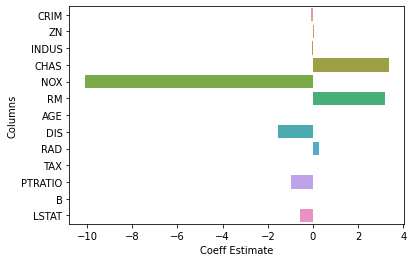

In [46]:
sns.barplot(x='Coeff Estimate', y='Columns', data=ridge_coeff)

## Lasso Regression

In [40]:
from sklearn.linear_model import Lasso

In [41]:
## Build Training model
laso = Lasso(alpha=1)
laso.fit(x_train, y_train)

Lasso(alpha=1)

In [42]:
# pred test data with Lasso model
y_pred_lasso = laso.predict(x_test)
y_pred_lasso

array([33.87170384, 18.21774281, 13.06376441, 24.67407229, 25.24239004,
       31.21606407, 11.33031584, 31.56750194, 34.9221751 , 20.27685153,
       21.50983151, 19.38801786, 27.28170372, 28.25491694, 22.71333517,
       27.6910388 , 31.22609565, 18.64926853,  2.74462725, 20.27100824,
       20.5153208 , 20.22688873, 20.47689372, 17.07861829, 15.86704723,
       38.10484655, 17.54796893, 28.67233101, 37.32994429,  4.83280167,
       15.74194597, 24.73714841, 27.18895553, 27.91646697, 30.41650727,
       17.82721546, 13.47715617, 33.9172788 , 15.58909279, 23.72944009,
       23.18563571, 20.12039914, 18.92944805, 21.9993217 , 24.21419244,
       22.11722471, 26.20643037, 23.56218196, 21.17370498, 22.07953974,
       23.84569261, 27.20740013, 22.50503409, 25.27962276, 31.17496545,
       24.90031756, 30.21600816, 23.28788823, 25.18508382, 16.63172566,
       25.75263925, 21.60038044, 12.50258047, 19.99240771, 21.99344995,
       20.34620903, 29.68755198, 23.79709337,  9.6089176 , 27.78

In [44]:
# Calculated Mean Squared error
meansqerrorL = np.mean((y_pred_lasso - y_test)**2)
print("Mean squared error on Test data set :",meansqerrorL)

Mean squared error on Test data set : 24.89833942505818


In [47]:
# Add Coefficient to their variable names
laso_coeff = pd.DataFrame()
laso_coeff["Columns"] = x_train.columns
laso_coeff['Coeff Estimate'] = pd.Series(laso.coef_)
laso_coeff

,Columns,Coeff Estimate
0,CRIM,-0.075152
1,ZN,0.046705
2,INDUS,-0.012272
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.518512
6,AGE,0.028469
7,DIS,-0.827094
8,RAD,0.257091
9,TAX,-0.015125


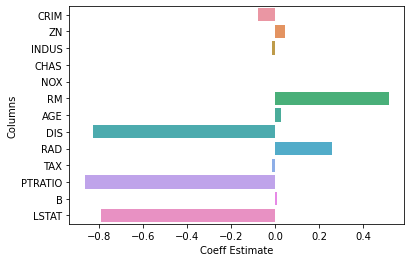

In [48]:
sns.barplot(x='Coeff Estimate', y='Columns', data=laso_coeff)

## ElasticNet Regression

In [49]:
from sklearn.linear_model import ElasticNet

In [51]:
## Build Training model
Enet = ElasticNet(alpha=0.4,l1_ratio=0.5)
Enet.fit(x_train, y_train)

ElasticNet(alpha=0.4)

In [52]:
# pred test data with Elasticnet model
y_pred_Enet = Enet.predict(x_test)
y_pred_Enet

array([35.90914153, 17.03750813, 13.01400546, 25.16182974, 24.94945105,
       31.74856948, 11.0963162 , 31.77886482, 36.46315802, 20.52059496,
       21.4483094 , 19.37374799, 26.82291248, 28.82876062, 22.21333932,
       28.60245064, 31.81836937, 18.71012768,  1.73421917, 20.43589538,
       20.31290548, 20.0442454 , 20.52164268, 15.45175738, 16.1013734 ,
       40.38145512, 18.35222234, 28.21658829, 39.45768344,  5.41770455,
       15.6297505 , 24.3632523 , 27.66327668, 27.99927516, 31.31544477,
       16.6473832 , 13.21131178, 33.64359611, 16.71029216, 23.81794526,
       23.08301639, 20.7017492 , 18.96729481, 21.96449331, 23.64199229,
       21.78664641, 26.01100574, 23.90632798, 21.10051239, 21.08631465,
       22.97850485, 26.02052666, 22.39365917, 24.80936902, 31.85976463,
       24.45823105, 30.43213981, 22.48652878, 25.18761327, 16.74331546,
       25.64708617, 21.13132496, 11.13228699, 19.46947538, 20.94051842,
       20.2506865 , 29.85606599, 23.3907435 ,  9.65921968, 27.92

In [53]:
# Calculated Mean Squared error
meansqerrorE = np.mean((y_pred_Enet - y_test)**2)
print("Mean squared error on Test data set :",meansqerrorE)

# Add Coefficient to their variable names
enet_coeff = pd.DataFrame()
enet_coeff["Columns"] = x_train.columns
enet_coeff['Coeff Estimate'] = pd.Series(Enet.coef_)
enet_coeff

Mean squared error on Test data set : 22.550202949386893


,Columns,Coeff Estimate
0,CRIM,-0.100148
1,ZN,0.050474
2,INDUS,-0.067663
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.667629
6,AGE,0.013311
7,DIS,-1.204286
8,RAD,0.297729
9,TAX,-0.015377


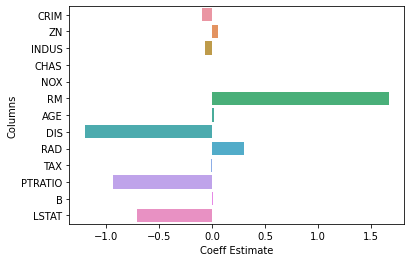

In [54]:
sns.barplot(x='Coeff Estimate', y='Columns', data=enet_coeff)

## All models Bar plot

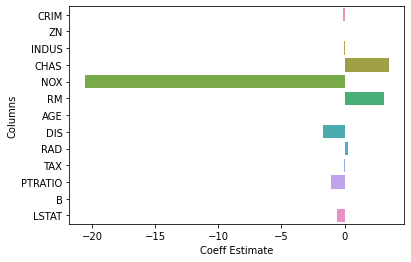

In [58]:
sns.barplot(x='Coeff Estimate', y='Columns', data=lreg_coeff)

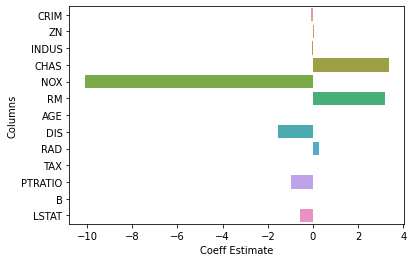

In [59]:
sns.barplot(x='Coeff Estimate', y='Columns', data=ridge_coeff)

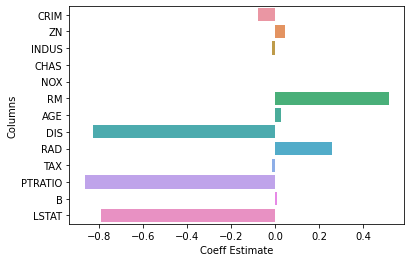

In [60]:
sns.barplot(x='Coeff Estimate', y='Columns', data=laso_coeff)

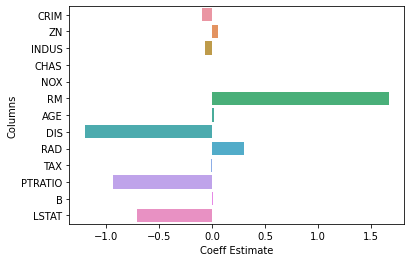

In [61]:
sns.barplot(x='Coeff Estimate', y='Columns', data=enet_coeff)